In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import sqlite3

%matplotlib inline

In [3]:
def sample(table, n = 20000): 
    """
    Randomly samples a particular table in the sqlite3 database for 
    n observations for various purposes. Runtime is not the best, so only 
    useful for calls for EDA purposes. Using apache spark is best if model 
    building is needed. 
    
    Keyword Arguments: 
    table - the table to pull from typically 'hmda_201X' 
    n - the the number of observations to pull from the dataset 
    """
    con = sqlite3.connect("../data/HMDA.db")
    query = f"""SELECT * FROM {table} ORDER BY RANDOM() LIMIT {n}"""
    df = pd.read_sql(sql = query, con = con)
    con.close()
    
    return df

In [4]:
data_2014 = sample("hmda_2014")


In [77]:
data_2014.columns.shape

(79,)

In [45]:
for col in data_2014.columns: 
    print(col, data_2014[col].unique())
    
    
###Filtering Data 
# We want only approved mortgages 

index [ 1467299  1237951  4399910 ... 11342625  7872010  7553743]
as_of_year [2014]
respondent_id ['0000019608' '32-0016270' '0000480228' ... '0000022394' '0000010171'
 '0000058262']
agency_name ['Federal Deposit Insurance Corporation'
 'Department of Housing and Urban Development'
 'Consumer Financial Protection Bureau'
 'National Credit Union Administration'
 'Office of the Comptroller of the Currency' 'Federal Reserve System']
agency_abbr ['FDIC' 'HUD' 'CFPB' 'NCUA' 'OCC' 'FRS']
agency_code [3 7 9 5 1 2]
loan_type_name ['Conventional' 'FHA-insured' 'FSA/RHS-guaranteed' 'VA-guaranteed']
loan_type [1 2 4 3]
property_type_name ['One-to-four family dwelling (other than manufactured housing)'
 'Manufactured housing' 'Multifamily dwelling']
property_type [1 2 3]
loan_purpose_name ['Home purchase' 'Refinancing' 'Home improvement']
loan_purpose [1 3 2]
owner_occupancy_name ['Owner-occupied as a principal dwelling'
 'Not owner-occupied as a principal dwelling' 'Not applicable']
owner_occupan

In [55]:
def filter(data): 
    filtered = data[data["property_type"] == 1]
    filtered = filtered[filtered["action_taken"] == 1]
    filtered = filtered[filtered["loan_purpose"] == 1]
    
    to_be_dropped = ["index", "respondent_id", 
                     "agency_name", "agency_abbr", "agency_code",
                     "loan_type_name", "loan_type", 
                     "property_type_name", "property_type", 
                     "loan_purpose_name", "loan_purpose", 
                     "owner_occupancy_name", "owner_occupancy", 
                     "preapproval_name", "preapproval", 
                     "action_taken_name", "action_taken"]
    
    year = str(filtered["as_of_year"].unique()[0])

    
    to_be_kept = ["loan_amount_000s", "population", "minority_population", "hud_median_family_income"]

    filtered = filtered.drop(columns = to_be_dropped)
    filtered = filtered.groupby("state_name").mean()[to_be_kept]
    
    
    return filtered
    

filter(data_2014)

,loan_amount_000s,population,minority_population,hud_median_family_income
state_name,,,,
Alabama,155.982456,5896.701754,24.134210,59917.543860
Alaska,271.050000,6061.200000,22.551500,82095.000000
Arizona,208.629139,5187.200000,34.970067,59551.655629
Arkansas,151.304348,5122.152174,18.366087,52578.260870
California,429.776471,5460.570588,50.718725,70607.450980
Colorado,254.084416,5014.305195,26.579416,73137.012987
Connecticut,364.743590,5066.641026,17.384359,92576.923077
Delaware,248.416667,6051.750000,22.987500,73483.333333
District of Columbia,354.625000,4473.500000,63.344999,107100.000000


In [51]:
### Zillow Data is only from Washington so that is data we want to be using 
def query_washington(year): 
    table = "hmda_{}".format(year)
    con = sqlite3.connect("../data/HMDA.db")
    query = f'SELECT * FROM {table} WHERE state_name is "Washington"'
    df = pd.read_sql(sql = query, con = con)
    con.close()
    
    return df

washington_2014 = query_washington(2014)


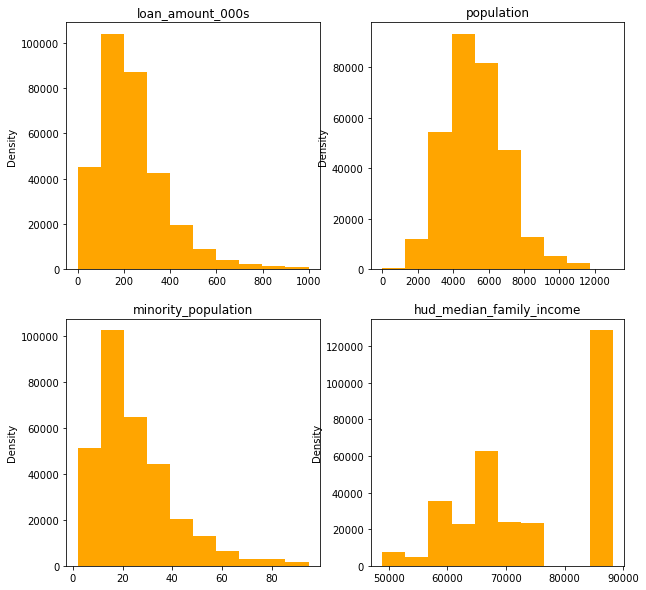

In [97]:
washington_2014 = washington_2014[washington_2014["loan_amount_000s"] < 1000]
to_be_kept = ["loan_amount_000s", "population", "minority_population", "hud_median_family_income"]

plt.rcParams['figure.figsize'] = [10,10]
fig, axes = plt.subplots(2,2)
plt.title("Histograms of relevant variables")

for ax, var in zip(axes.flatten()[:], to_be_kept): 
    ax.hist(washington_2014[var], color = "orange")
    ax.set_title(var)
    ax.set_ylabel("Density")
    
plt.savefig("../plots/hmda_hist.png")

In [91]:
(washington_2014.loan_amount_000s == 99999).sum()

1

In [66]:
washington = filter(washington_2014)

In [67]:
washington = washington.transpose()

In [69]:
washington.rename(columns = {"Washington": "2014"})

state_name,2014
loan_amount_000s,276.019697
population,5325.572092
minority_population,24.663210
hud_median_family_income,75150.266877


In [72]:
for year in [2014, 2015, 2016, 2017]: 
    year_frame = query_washington(year)
    year_frame = filter(year_frame).transpose()
    year_frame = year_frame.rename(columns  = {"Washington": str(year)})
    washington[str(year)] = year_frame[str(year)]
    
    
washington

state_name,Washington,2014,2015,2016,2017
loan_amount_000s,276.019697,276.019697,296.667876,315.794318,341.408179
population,5325.572092,5325.572092,5344.553204,5332.407140,5579.166888
minority_population,24.663210,24.663210,24.600485,24.617906,26.248856
hud_median_family_income,75150.266877,75150.266877,76803.155761,76418.259577,79440.841106


In [74]:
washington = washington.drop(columns = ["Washington"])

In [76]:
washington.to_csv("../data/washington.csv")

In [98]:
washington.to_latex("../report/wash.tex")

In [8]:
zillow = pd.read_csv("../data/zillow_merged.csv")
zillow.head()

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,ZSFH,99999,2021-02-28,396263.0,ZHVI Single-Family Homes Time Series ($),Home values,zip,98847; WA; Wenatchee; Chelan County; Peshastin
1,ZSFH,99999,2021-01-31,389595.0,ZHVI Single-Family Homes Time Series ($),Home values,zip,98847; WA; Wenatchee; Chelan County; Peshastin
2,ZSFH,99999,2020-12-31,383270.0,ZHVI Single-Family Homes Time Series ($),Home values,zip,98847; WA; Wenatchee; Chelan County; Peshastin
3,ZSFH,99999,2020-11-30,378566.0,ZHVI Single-Family Homes Time Series ($),Home values,zip,98847; WA; Wenatchee; Chelan County; Peshastin
4,ZSFH,99999,2020-10-31,375825.0,ZHVI Single-Family Homes Time Series ($),Home values,zip,98847; WA; Wenatchee; Chelan County; Peshastin


In [17]:
dates = pd.to_datetime(zillow.date, infer_datetime_format = True)

In [39]:
zillow["region"][0].split(";")
def zip_split(loc, index = 0): 
    return loc.split(";")[index]


zillow["zip"] = zillow["region"].apply(zip_split)

<AxesSubplot:>

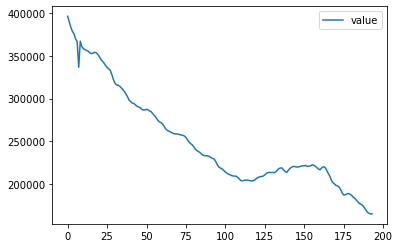

In [47]:
wenatchee = zillow[zillow["zip"] == '98847']
wenatchee[["date", "value"]].plot()